# Model Training

In [1]:
import pandas as pd
import ast
import warnings
import os
warnings.filterwarnings("ignore")
import sys
sys.path.append("../")
from utils.machine_learning import DataPreprocess, ModelTraining, MetricsVisualizations, compare_confusion_matrices

In [2]:
preprocess = DataPreprocess()
trainer = ModelTraining()

# Data

In [3]:
df_all = pd.read_csv("./Data/ml_clientes_all_features.csv")
print(f"Shape: {df_all.shape}")
df_all.head()

Shape: (10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3 or more,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df_reduced = pd.read_csv("./Data/ml_clientes_reduced_features.csv")
print(f"Shape: {df_reduced.shape}")
df_reduced.head()

Shape: (10000, 8)


,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,France,Female,42,0.00,1,1,1,1
1,Spain,Female,41,83807.86,1,0,1,0
2,France,Female,42,159660.80,3 or more,1,0,1
3,France,Female,39,0.00,2,0,0,0
4,Spain,Female,43,125510.82,1,1,1,0


# Preprocessing the Data

### Based on the information gathered during **Feature Engineering**:
- `Age` = Log Transformation
- `CreditScore`, `Tenure`, `Balance` and `EstimatedSalary` = No transformation needed

### For the preprocess step, the data will be divided into a train and test split. The numerical columns will be transformed using the log transformation, and then they will be scaled using the MinMax Scaler since the majority of the data will be 0 or 1, so this scaler helps by putting all numerical features between 0 and 1. Also, onehot encoding will be performed on the categorical columns of the dataset
### This process will be done for each dataset and both preprocessor objects will be saved in the **Artifacts** folder

In [5]:
X_train_all, X_test_all, y_train_all, y_test_all = preprocess.preprocess_data(df_all, target_name="Exited", test_size=0.3)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = preprocess.preprocess_data(df_reduced, target_name="Exited", test_size=0.3, reduced_columns=True)

# Modeling

### For the modeling phase, four models will be used: Logistic Regression, Random Forest, XGBoost and SVM. This combination of models allows for comparisons between both simple and complex approaches to find the best solution for the churn prediction
### During each training and testing, two methods will be used to solve the imbalance issue of the target. The first one is using the parameter `class_weight` on the models that have it. The second method is the utilization of `SMOTE`, an oversampling method that uses synthetic data to balance the target. `SMOTE` will only be applied to the training sets, with the test sets having the original imbalance of the data
### After the models are trained and tested, they will be evaluated in terms of the metrics `Recall`, `Precision`, `f1` and `ROC-AUC`. `f1` and `Recall` are the most important metrics here, since the primary goal is churn prediction. `Recall` will measure the proportion of true positives out of the actual positives, with a high recall consisting of a low number of false negatives. `Precision` will measure the proportion of positive predictions that are actually correct, with fewer false positives indicating a higher precision. `f1` will be the harmonic average between them, and `ROC-AUC` will evaluate the model's ability to discriminate the data between the two classes
### For this analysis, I will presume that the cost of a false negative (client that churned, and the model said it wouldn't) is way higher than the cost of a false positive (client that the model said it would churn, but it didn't). The reason is that, from my knowledge, it's way more expensive to attract and maintain a new client than it is to keep an already existing client happy
### A high `Recall` is important, since a low number of false negatives indicates a low chance of missing a client that actually left the institution. But this is useless if the precision is extremely low. Because of this, both `Recall` and `f1` will be the focus of the model training. They will be used as the scoring metrics to evaluate the models and `f1` will be used to refit the best model
### To train the models, `RandomSearchCV` will be used to fine tune them and use cross-validation. Also, a repo in DagsHub will be used, along with MLflow to keep track of all the information about the models

# All features

## Using class_weight = balanced

In [6]:
model_report_all_features = trainer.initiate_model_trainer((X_train_all, y_train_all, X_test_all, y_test_all), "All Features", ["f1", "recall"], "f1")

2025/01/13 16:52:25 INFO mlflow.tracking.fluent: Experiment with name 'All Features' does not exist. Creating a new experiment.
2025/01/13 16:52:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Logistic Regression - All Features'.
2025/01/13 16:52:37 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Logistic Regression - All Features, version 1
Created version '1' of model 'Logistic Regression - All Features'.


🏃 View run Logistic Regression at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/0/runs/c2e939c7112e48e29e7e975bf2e996bd
🧪 View experiment at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/0


2025/01/13 16:53:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Random Forest - All Features'.
2025/01/13 16:53:12 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest - All Features, version 1
Created version '1' of model 'Random Forest - All Features'.


🏃 View run Random Forest at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/0/runs/a8a0f31e06404c2aa804ff3f56d05302
🧪 View experiment at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/0


2025/01/13 16:53:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'XGBoost - All Features'.
2025/01/13 16:53:31 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost - All Features, version 1
Created version '1' of model 'XGBoost - All Features'.


🏃 View run XGBoost at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/0/runs/851daaf1e3a24960a6dd6c65877566bd
🧪 View experiment at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/0


2025/01/13 16:57:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'SVM - All Features'.
2025/01/13 16:57:53 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: SVM - All Features, version 1
Created version '1' of model 'SVM - All Features'.


🏃 View run SVM at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/0/runs/046e6c91e5c244488d74b47a9e47420d
🧪 View experiment at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/0


In [7]:
metrics_all_features = MetricsVisualizations(model_report_all_features)

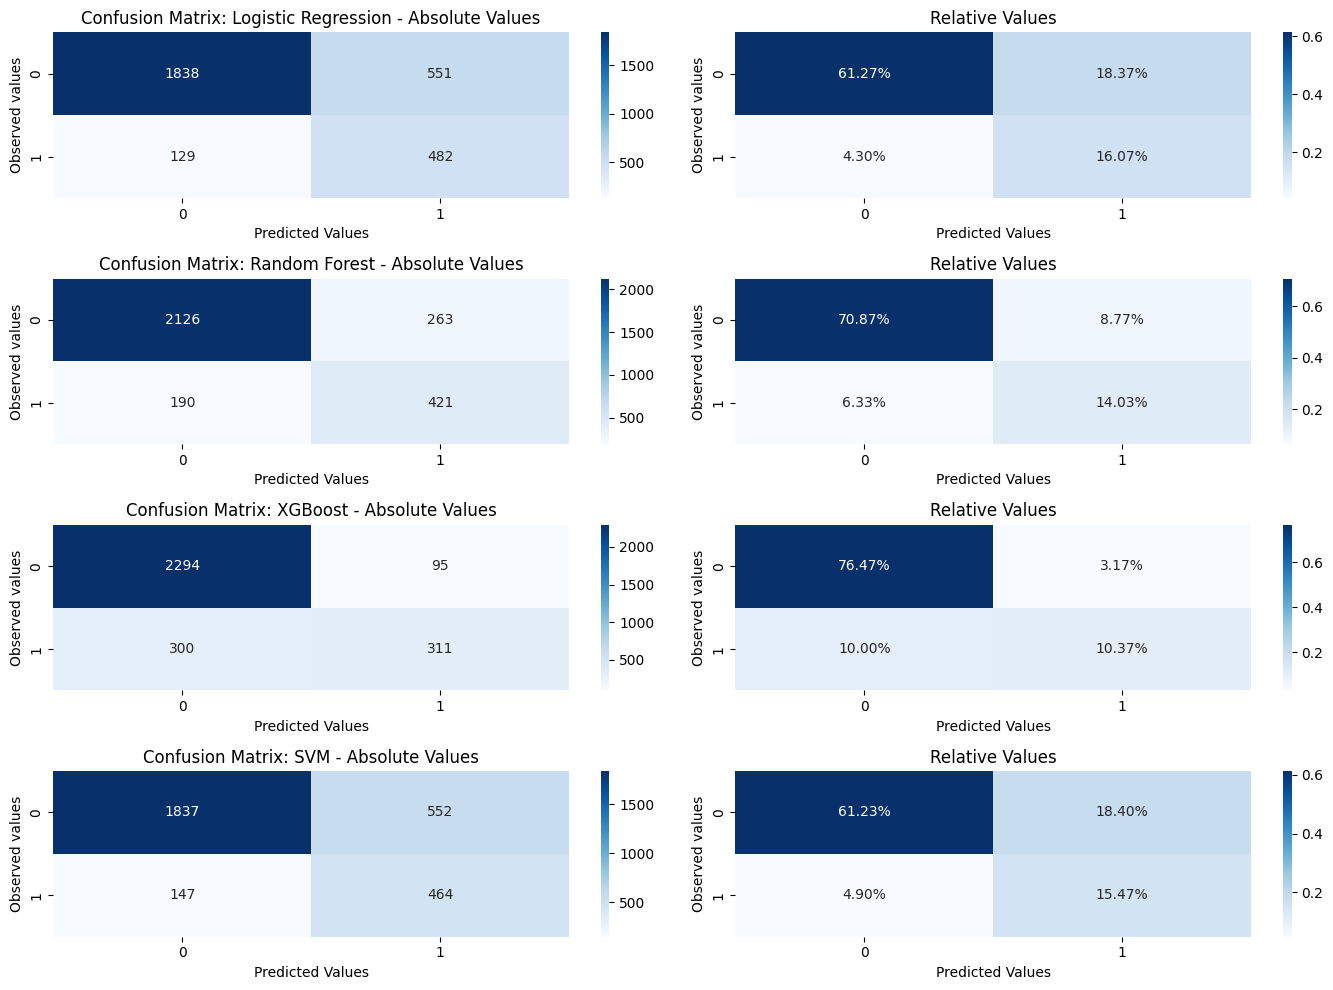

In [8]:
metrics_all_features.visualize_confusion_matrix(y_test_all, 4, 2)

### Observations:
- The logistic regression model had a very high number of false positives, indicating that the model has very little `Precision`. Despite having a high `Recall`, the amount of false positives makes this model far from ideal
- The random forest model had a way lower number of false positives and a controlled number of false negatives
- The XGBoost had an incredible `Precision`, but at a cost of a very low `Recall`
- SVM performed similarly to the logistic regression

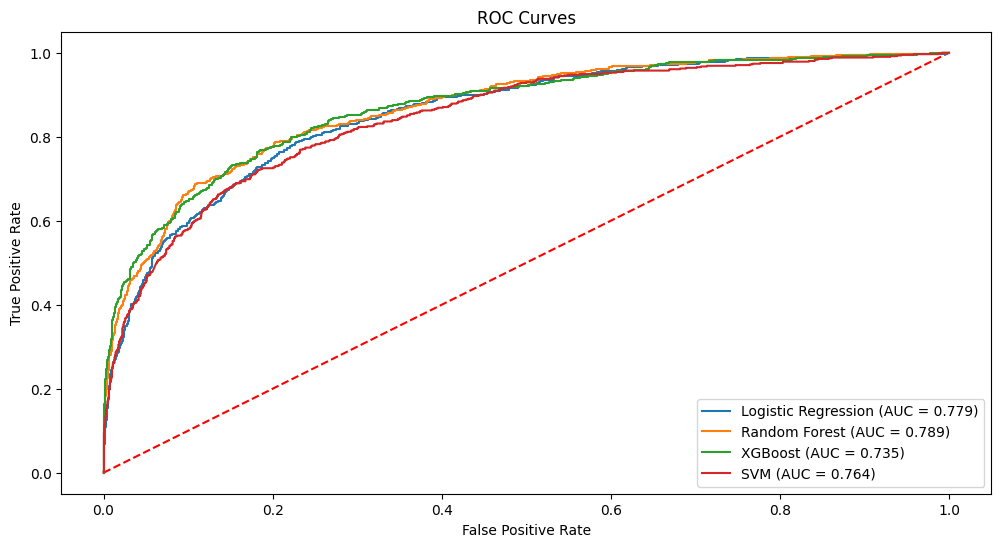

In [9]:
metrics_all_features.visualize_roc_curves()

### Observations:
- The random forest model has the highest ROC-AUC scores, indicating that it's the best model at discriminating the data between both classes
- The logistic regression and SVM models show decent scores, almost tying with the random forest model
- XGBoost had an acceptable score, but it was the lowest one

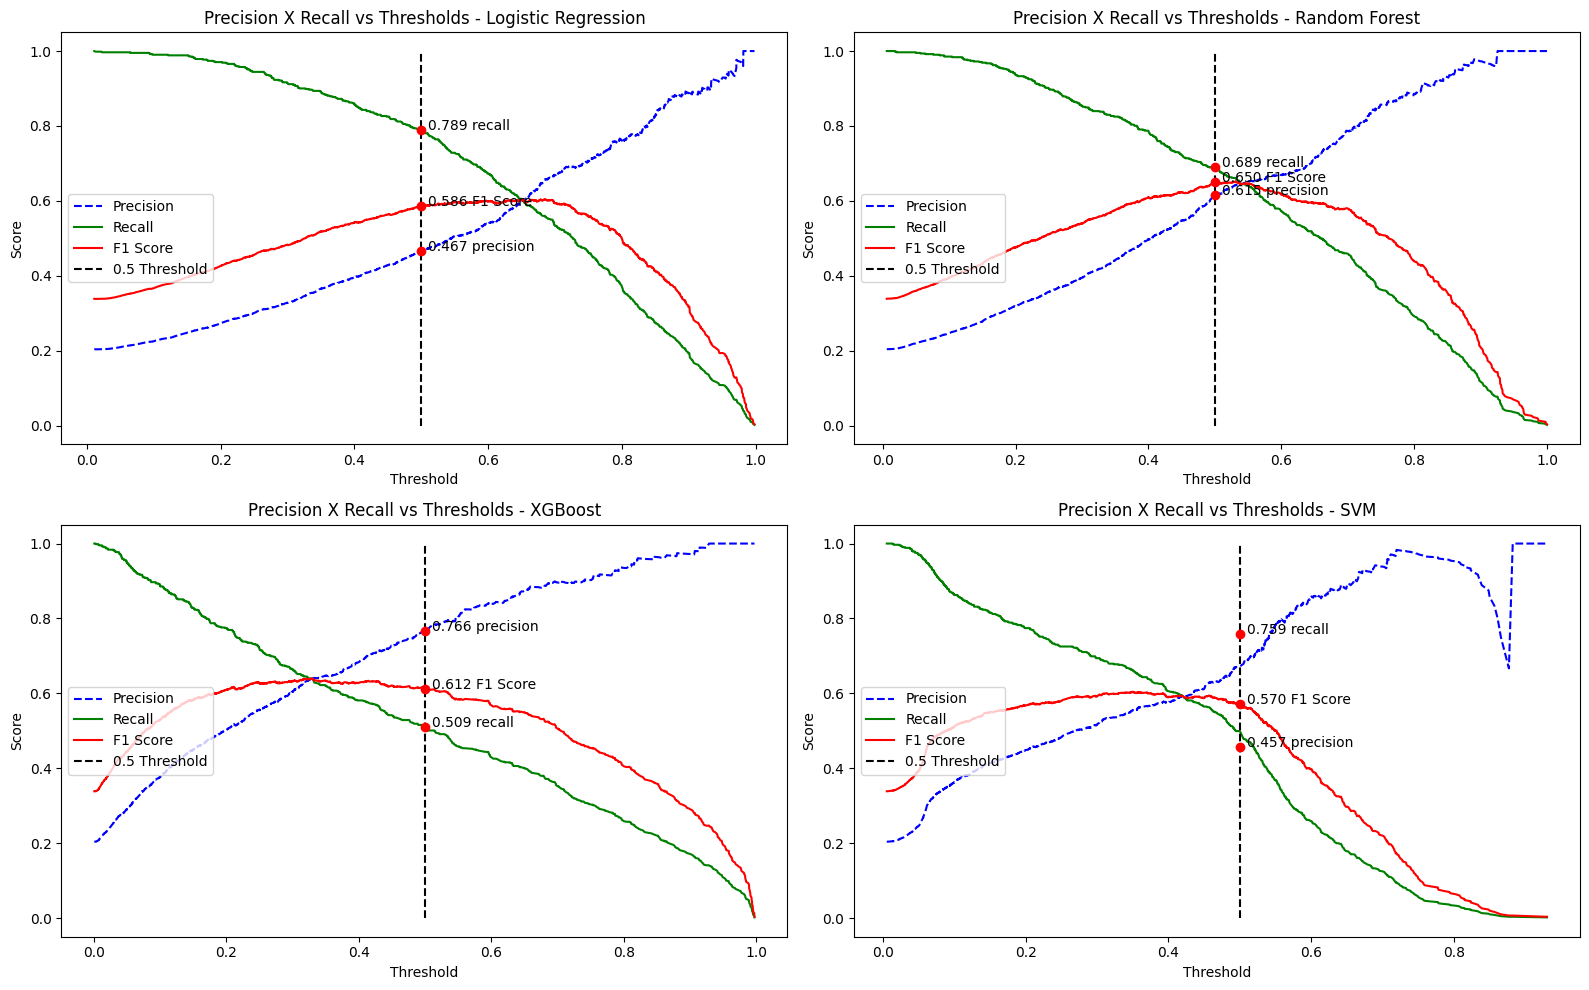

In [10]:
metrics_all_features.plot_precision_recall_threshold(y_test_all, X_test_all, 2, 2)

### Observations:
- For all models, `f1` is already at the top or with minimal improvement in changing the threshold of the models

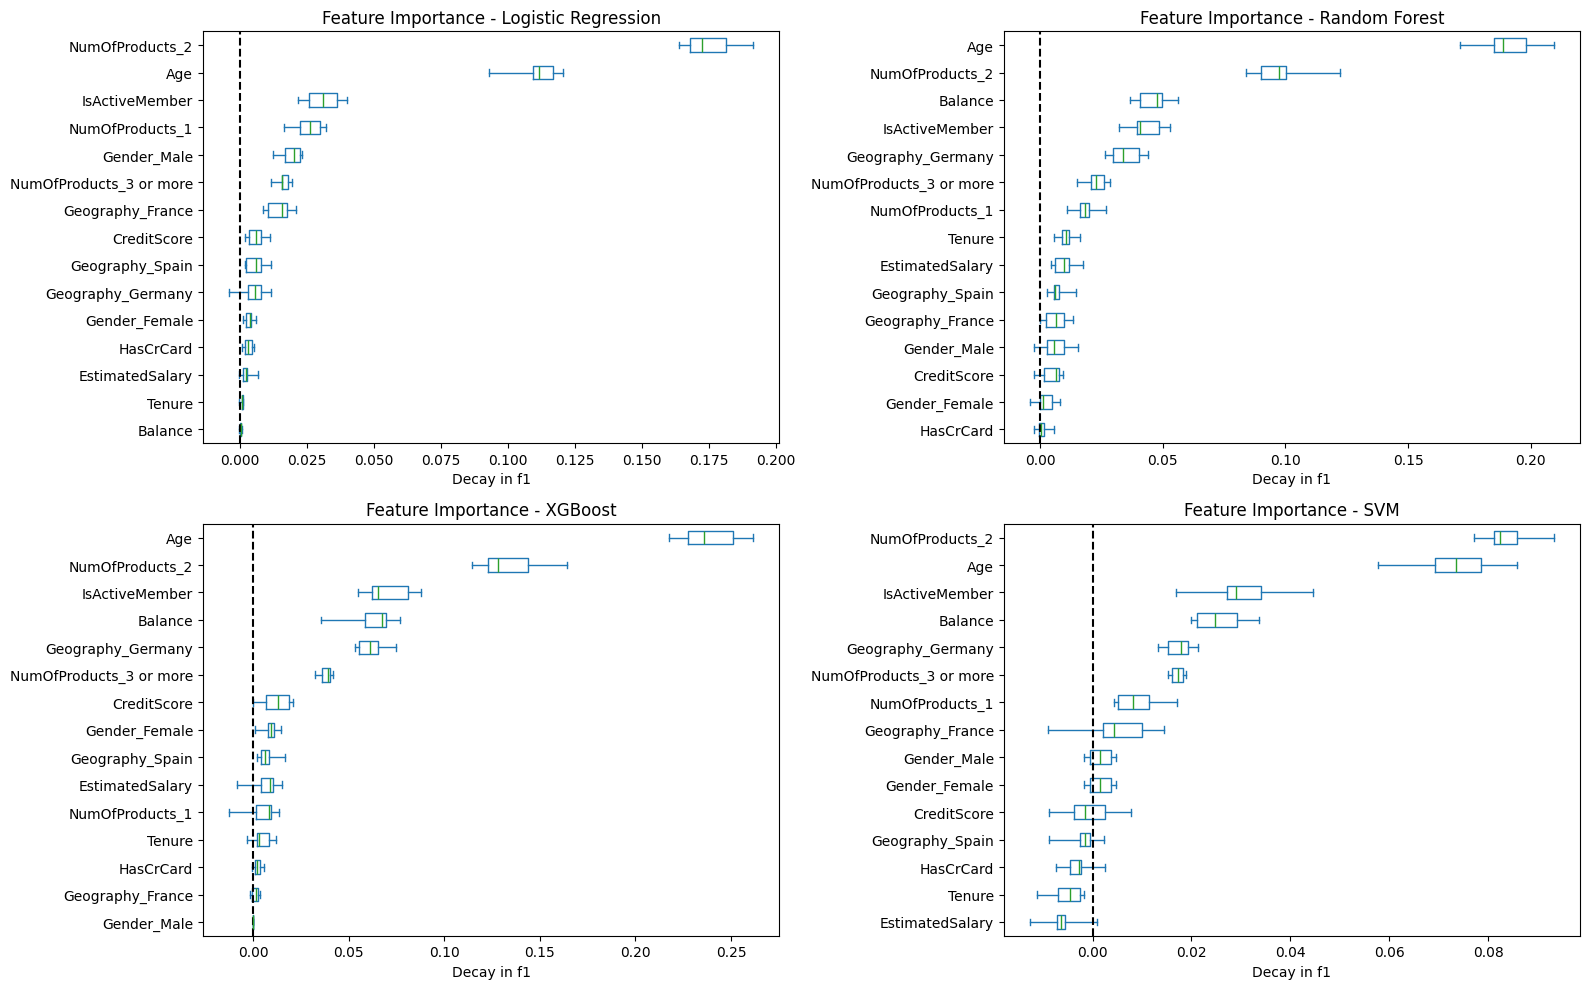

In [11]:
metrics_all_features.plot_feature_importance(y_test_all, X_test_all, "f1", 2, 2)

### Observations:
- In the Logistic Regression, the three columns `CreditScore`, `Tenure` and `EstimatedSalary` are the least important ones and in the SVM model, they actually hurt the model's performance
- For all models, apart from the logistic regression, `Age`, `NumOfProducts2` `IsActiveMember`, `Balance` and `Geography_Germany` are always the top 5 more important features, confirming what was found during the EDA

## Using SMOTE

In [12]:
model_report_all_features_smote = trainer.initiate_model_trainer((X_train_all, y_train_all, X_test_all, y_test_all), "All Features", ["f1", "recall"], "f1", use_smote=True)

2025/01/13 16:58:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Logistic Regression - All Features' already exists. Creating a new version of this model...
2025/01/13 16:58:41 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Logistic Regression - All Features, version 2
Created version '2' of model 'Logistic Regression - All Features'.


🏃 View run Logistic Regression at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/0/runs/45e556c8680543908929cf091c09feb3
🧪 View experiment at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/0


2025/01/13 16:59:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Random Forest - All Features' already exists. Creating a new version of this model...
2025/01/13 16:59:48 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest - All Features, version 2
Created version '2' of model 'Random Forest - All Features'.


🏃 View run Random Forest at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/0/runs/49ea179012434a668e10649754e976fc
🧪 View experiment at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/0


2025/01/13 17:00:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'XGBoost - All Features' already exists. Creating a new version of this model...
2025/01/13 17:00:09 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost - All Features, version 2
Created version '2' of model 'XGBoost - All Features'.


🏃 View run XGBoost at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/0/runs/268c75c9642e46f78f510e20d0a10e39
🧪 View experiment at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/0


2025/01/13 17:10:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'SVM - All Features' already exists. Creating a new version of this model...
2025/01/13 17:10:15 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: SVM - All Features, version 2
Created version '2' of model 'SVM - All Features'.


🏃 View run SVM at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/0/runs/1e07564587084146ad0c2db77e0f5cc2
🧪 View experiment at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/0


In [13]:
metrics_all_features_smote = MetricsVisualizations(model_report_all_features_smote)

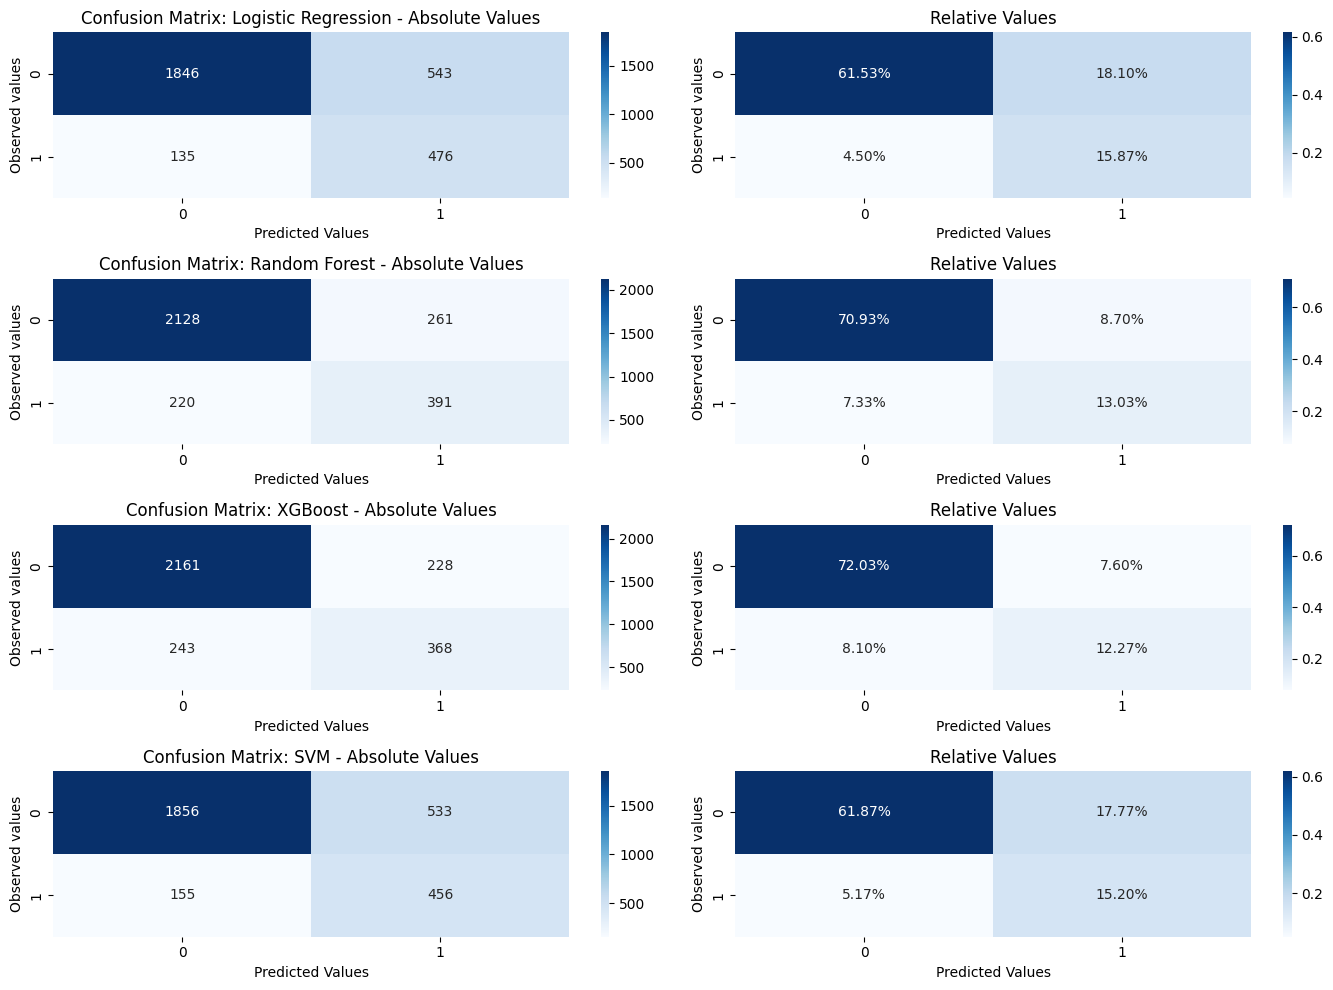

In [14]:
metrics_all_features_smote.visualize_confusion_matrix(y_test_all, 4, 2)

### Observations:
- Logistic Regression and SVM showed no changes in performance
- Random Forest got worse, where the `Precision` stayed the same, but `Recall` is worse
- XGBoost had an improvement in `Recall` but way worse `Precision`. Still, the model is more balanced now

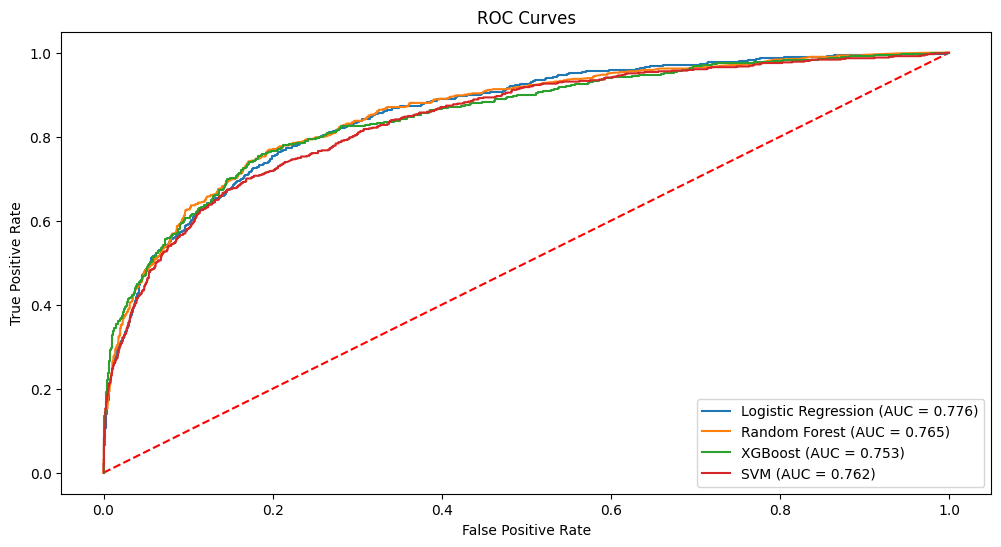

In [15]:
metrics_all_features_smote.visualize_roc_curves()

### Observations:
- All models had basically the same scores

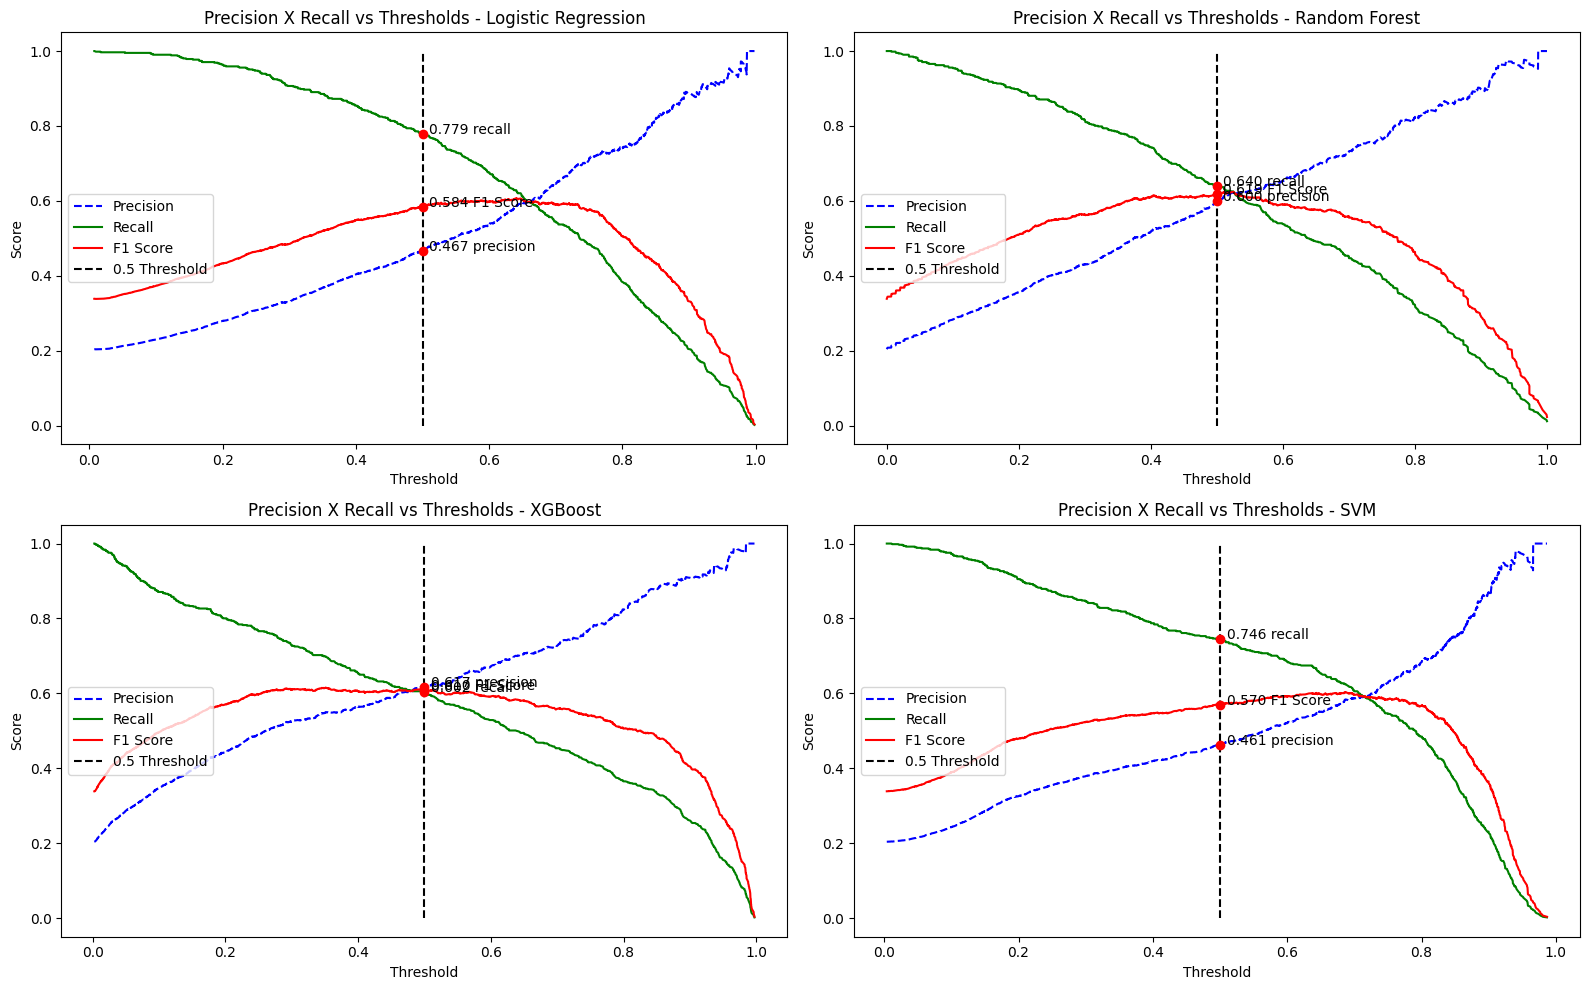

In [16]:
metrics_all_features_smote.plot_precision_recall_threshold(y_test_all, X_test_all, 2, 2)

### Observations:
- All models already have the highest possible `f1`, or a minimal improvement on changing the threshold

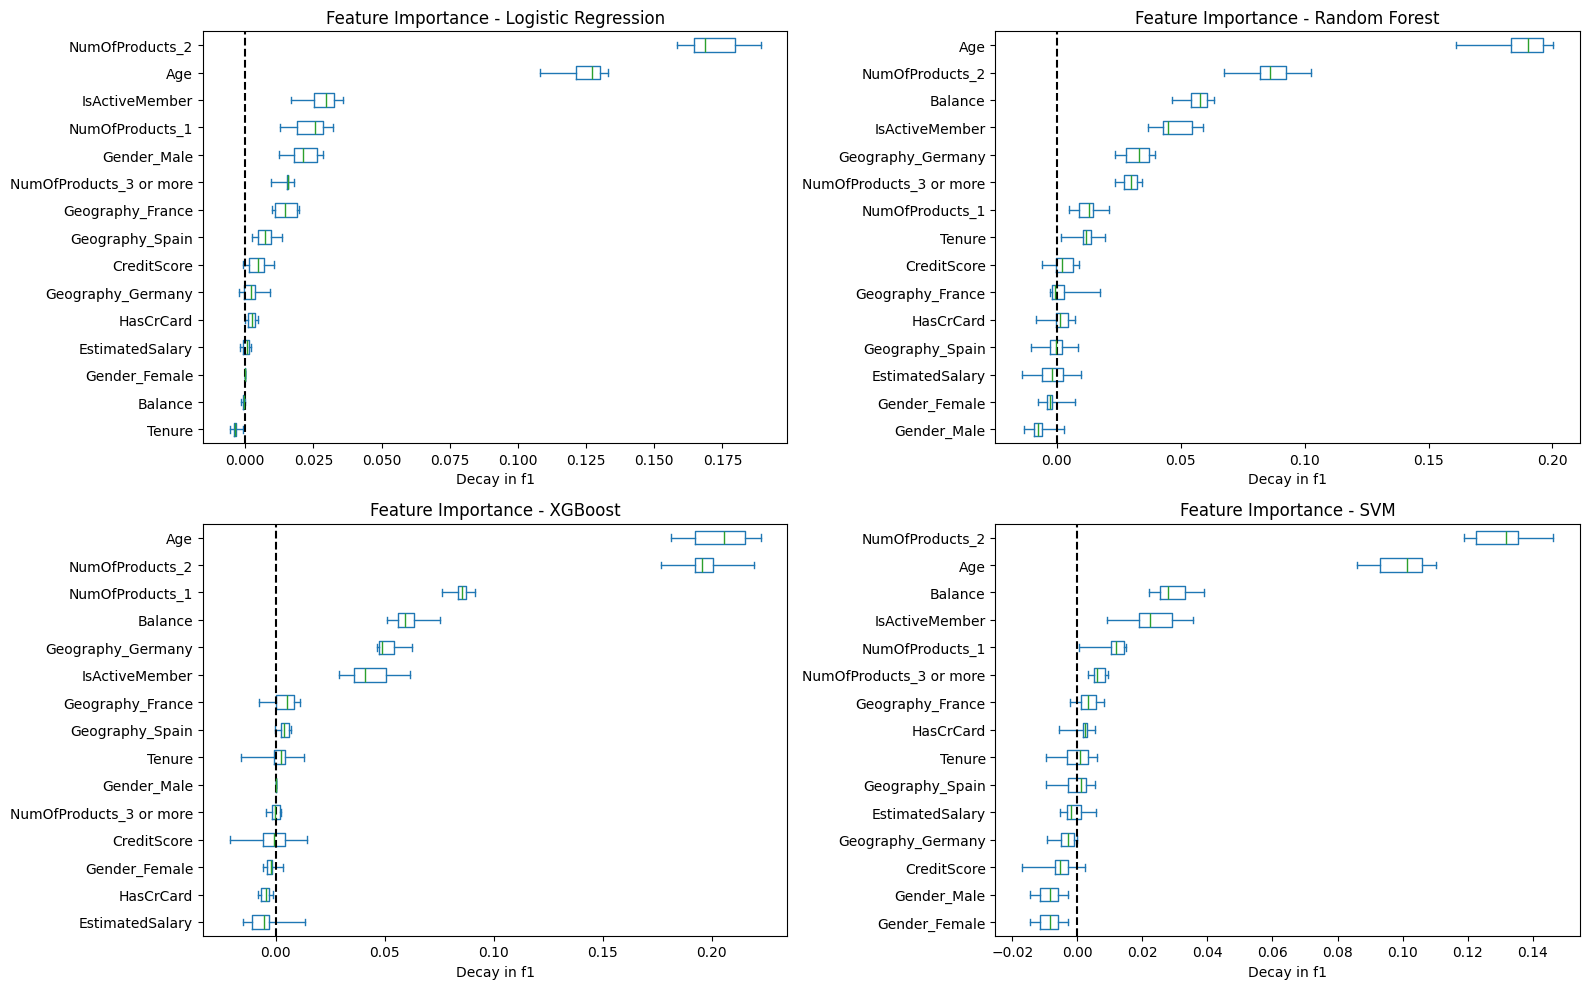

In [17]:
metrics_all_features_smote.plot_feature_importance(y_test_all, X_test_all, "f1", 2, 2)

### Observations:
- Both `Gender` columns are now hurting the model's performance, except on the logistic regression, where `Gender Male` is the fifth most important feature
- XGBoost shows that the top 6 most important columns are the only ones with an actual impact on the model, with all others hurting or having close to zero impact. In contrast, all other models have a more gentle curve to show what features are impactful or not

# Reduced Features

## Using class_weight = balanced

In [18]:
model_report_reduced_features = trainer.initiate_model_trainer((X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced), "Reduced Features", ["f1", "recall"], "f1")

2025/01/13 17:14:17 INFO mlflow.tracking.fluent: Experiment with name 'Reduced Features' does not exist. Creating a new experiment.
2025/01/13 17:14:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Logistic Regression - Reduced Features'.
2025/01/13 17:14:27 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Logistic Regression - Reduced Features, version 1
Created version '1' of model 'Logistic Regression - Reduced Features'.


🏃 View run Logistic Regression at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/1/runs/f7c404aa21bd48c2b305b45d3d68f04a
🧪 View experiment at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/1


2025/01/13 17:14:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Random Forest - Reduced Features'.
2025/01/13 17:15:01 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest - Reduced Features, version 1
Created version '1' of model 'Random Forest - Reduced Features'.


🏃 View run Random Forest at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/1/runs/5d9d959eedf34ad3861c28e78650bea2
🧪 View experiment at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/1


2025/01/13 17:15:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'XGBoost - Reduced Features'.
2025/01/13 17:15:17 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost - Reduced Features, version 1
Created version '1' of model 'XGBoost - Reduced Features'.


🏃 View run XGBoost at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/1/runs/1bebf482ef9f458c91e7343d54873607
🧪 View experiment at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/1


2025/01/13 17:19:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'SVM - Reduced Features'.
2025/01/13 17:19:19 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: SVM - Reduced Features, version 1
Created version '1' of model 'SVM - Reduced Features'.


🏃 View run SVM at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/1/runs/8f5315068b304b648098d334ccacd30a
🧪 View experiment at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/1


In [19]:
metrics_reduced_features = MetricsVisualizations(model_report_reduced_features)

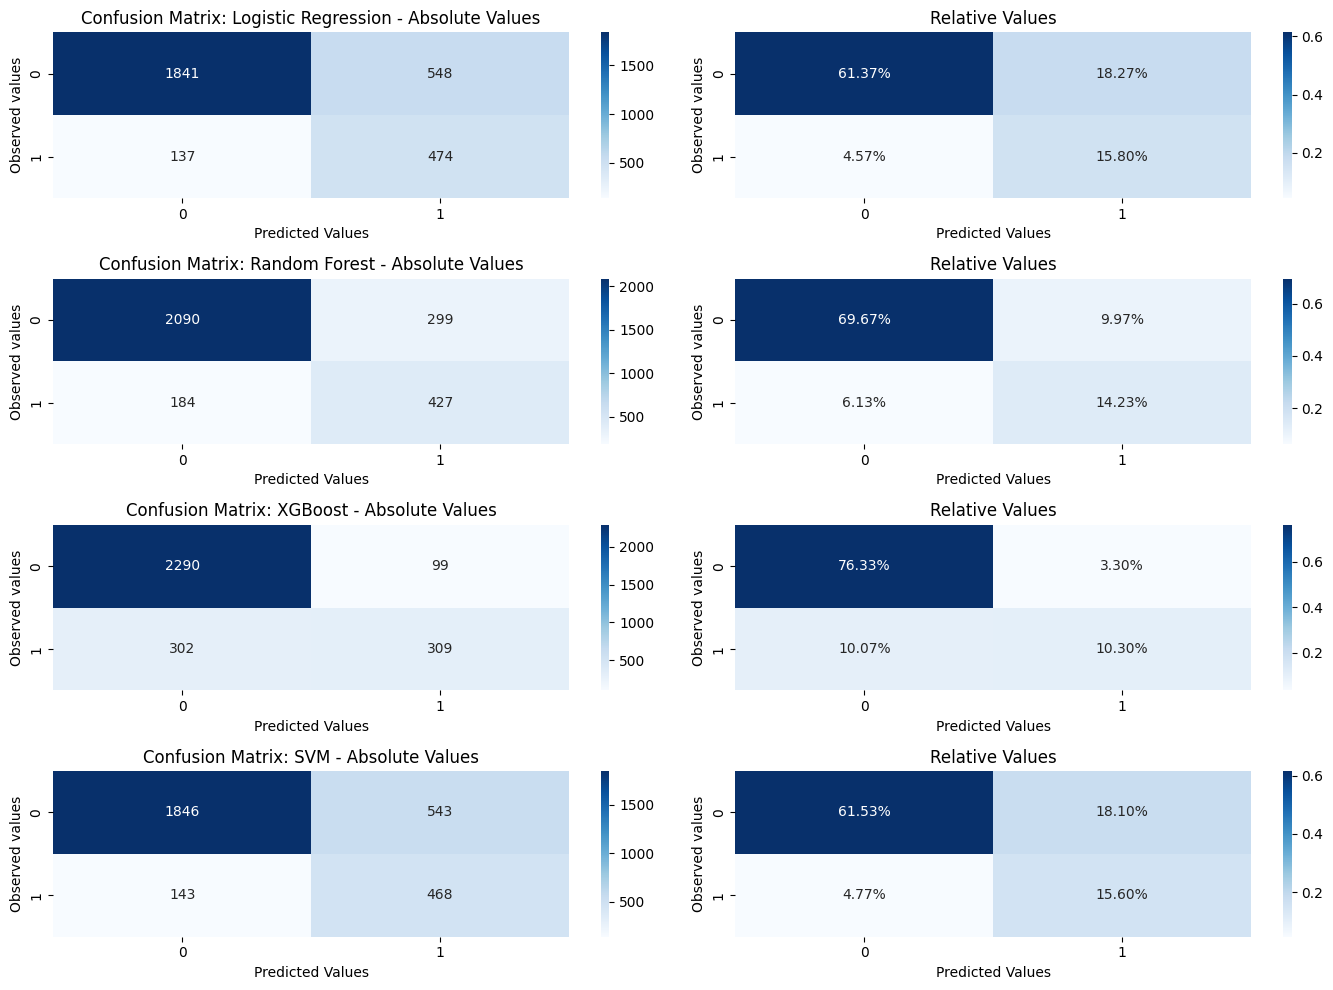

In [20]:
metrics_reduced_features.visualize_confusion_matrix(y_test_reduced, 4, 2)

### Observations:
- Logistic Regression, SVM and XGBoost all had similar performance compared to the dataset using all features
- Random Forest had fewer false negatives, but a lot more of false positives

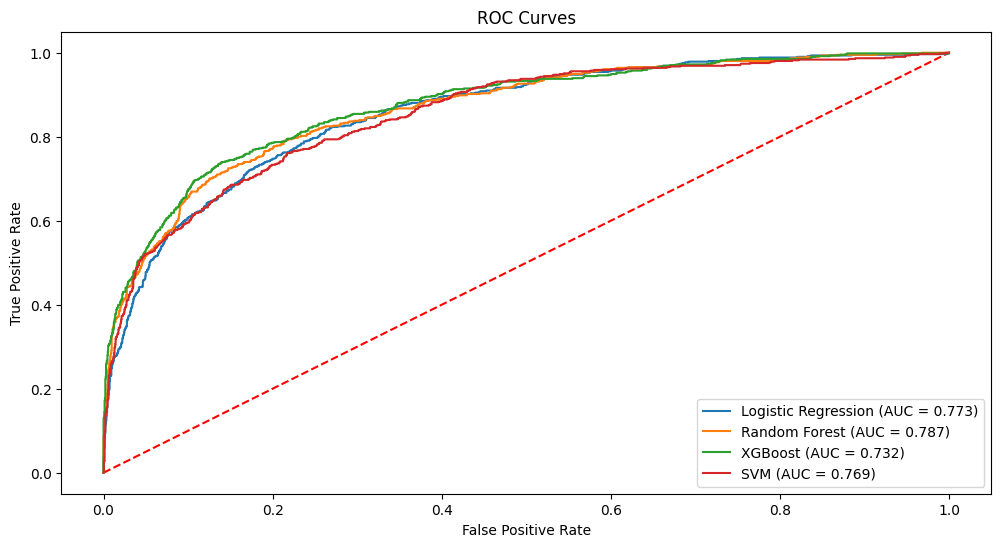

In [21]:
metrics_reduced_features.visualize_roc_curves()

### Observations:
- Again the XGBoost model shows the lowest scores while the other three models are basically tied

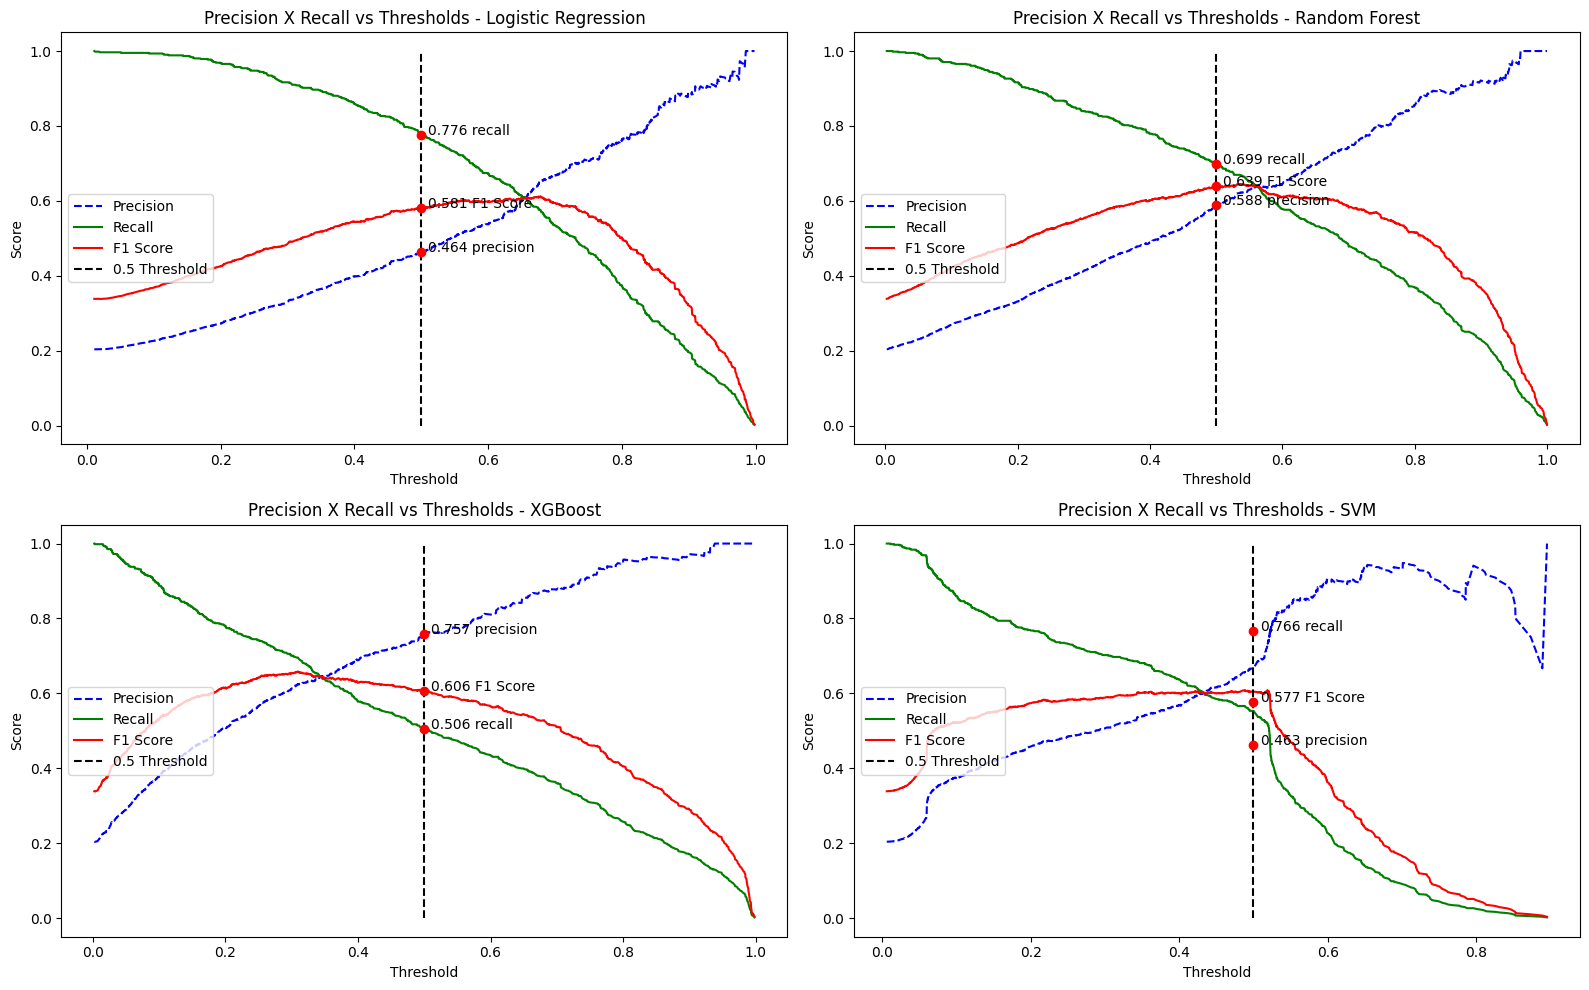

In [22]:
metrics_reduced_features.plot_precision_recall_threshold(y_test_reduced, X_test_reduced, 2, 2)

### Observations:
- While the other models are all close to or with the max value of `f1`, XGBoost `f1` line shows that when using this model with a 0.3 threshold, there's a clear improvement

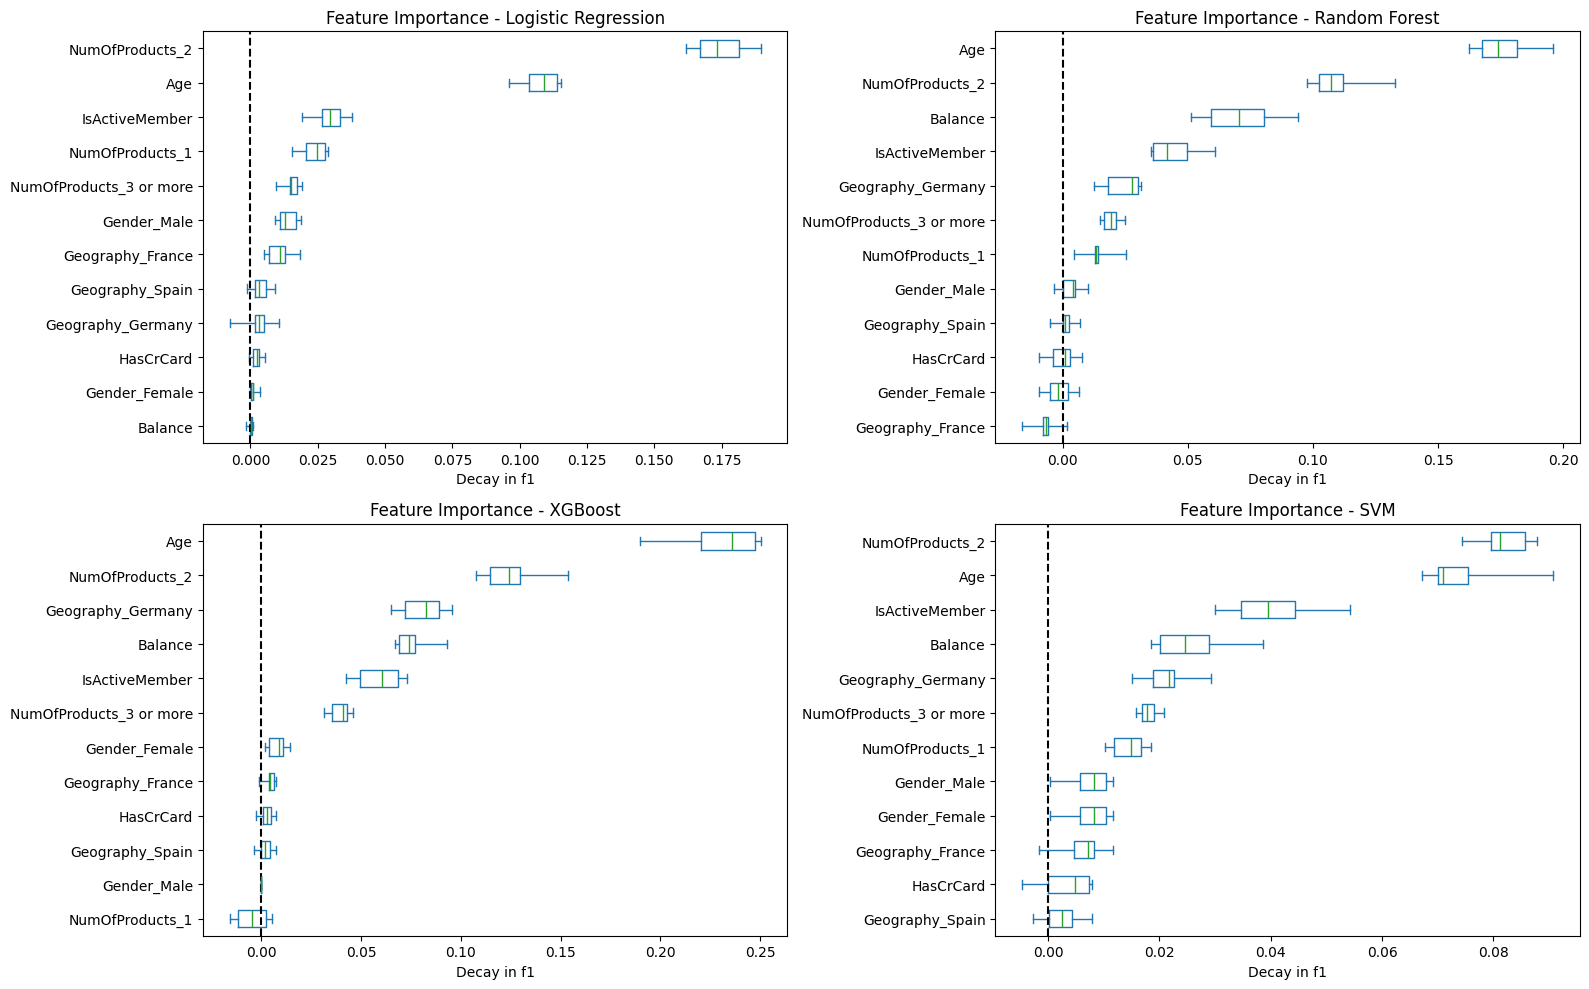

In [23]:
metrics_reduced_features.plot_feature_importance(y_test_reduced, X_test_reduced, "f1", 2, 2)

### Observations:
- All models show the same behavior compared to the ones using all features regarding feature importance

## Using SMOTE

In [24]:
model_report_reduced_features_smote = trainer.initiate_model_trainer((X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced), "Reduced Features", ["f1", "recall"], "f1", use_smote=True)

2025/01/13 17:19:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Logistic Regression - Reduced Features' already exists. Creating a new version of this model...
2025/01/13 17:19:55 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Logistic Regression - Reduced Features, version 2
Created version '2' of model 'Logistic Regression - Reduced Features'.


🏃 View run Logistic Regression at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/1/runs/b4f64a5aedae4f389272f1570aa0be83
🧪 View experiment at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/1


2025/01/13 17:20:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Random Forest - Reduced Features' already exists. Creating a new version of this model...
2025/01/13 17:20:55 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest - Reduced Features, version 2
Created version '2' of model 'Random Forest - Reduced Features'.


🏃 View run Random Forest at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/1/runs/e2241ff02f7e45449b4bb1d51ee24a4d
🧪 View experiment at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/1


2025/01/13 17:21:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'XGBoost - Reduced Features' already exists. Creating a new version of this model...
2025/01/13 17:21:14 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost - Reduced Features, version 2
Created version '2' of model 'XGBoost - Reduced Features'.


🏃 View run XGBoost at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/1/runs/ba47e81076254d86b396c72e97beded2
🧪 View experiment at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/1


2025/01/13 17:30:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'SVM - Reduced Features' already exists. Creating a new version of this model...
2025/01/13 17:30:46 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: SVM - Reduced Features, version 2
Created version '2' of model 'SVM - Reduced Features'.


🏃 View run SVM at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/1/runs/5c075e4ef20349308a3b223647acae5c
🧪 View experiment at: https://dagshub.com/vitorccmanso/Case-Indicium.mlflow/#/experiments/1


In [25]:
metrics_reduced_features_smote = MetricsVisualizations(model_report_reduced_features_smote)

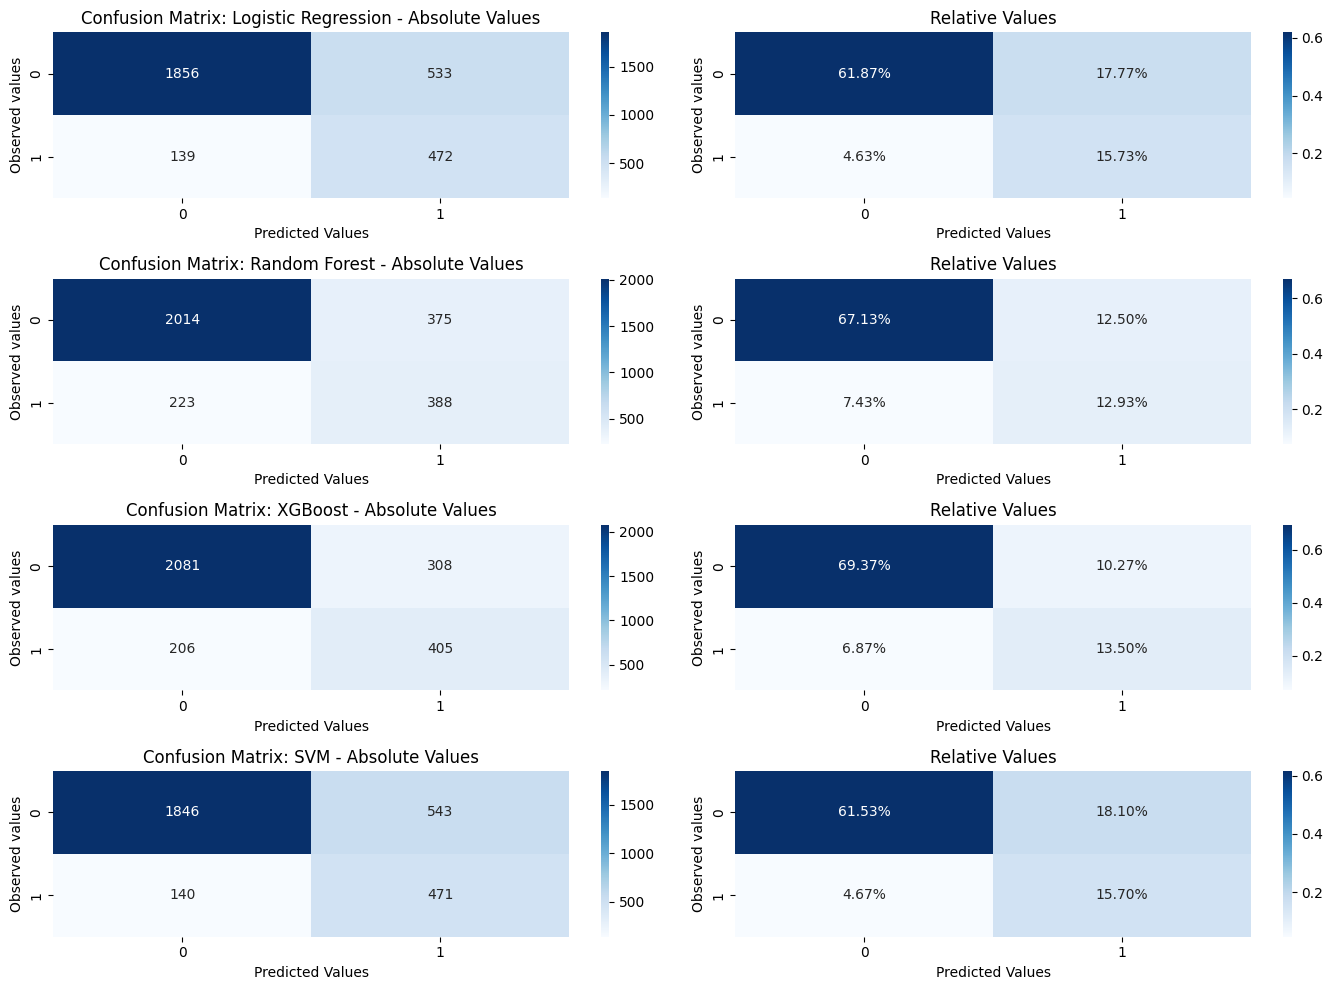

In [26]:
metrics_reduced_features_smote.visualize_confusion_matrix(y_test_reduced, 4, 2)

### Observations:
- The same results that happened with all features while using SMOTE are repeating for the Logistic Regression and SVM, which showed no improvement.
- XGBoost is more balanced, but the amount of false positives of the model is way too high
- Random Forest had a higher number of false negatives, while also increasing the numbers of false positives 

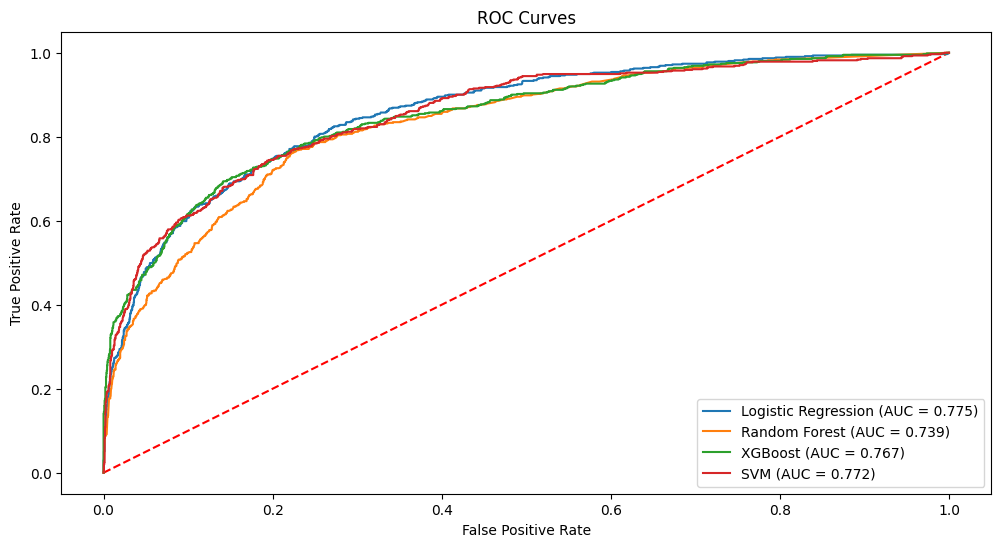

In [27]:
metrics_reduced_features_smote.visualize_roc_curves()

### Observations:
- All models have basically the same scores apart from Random Forest, which had the lowest ROC-AUC scores out of all rf models trained

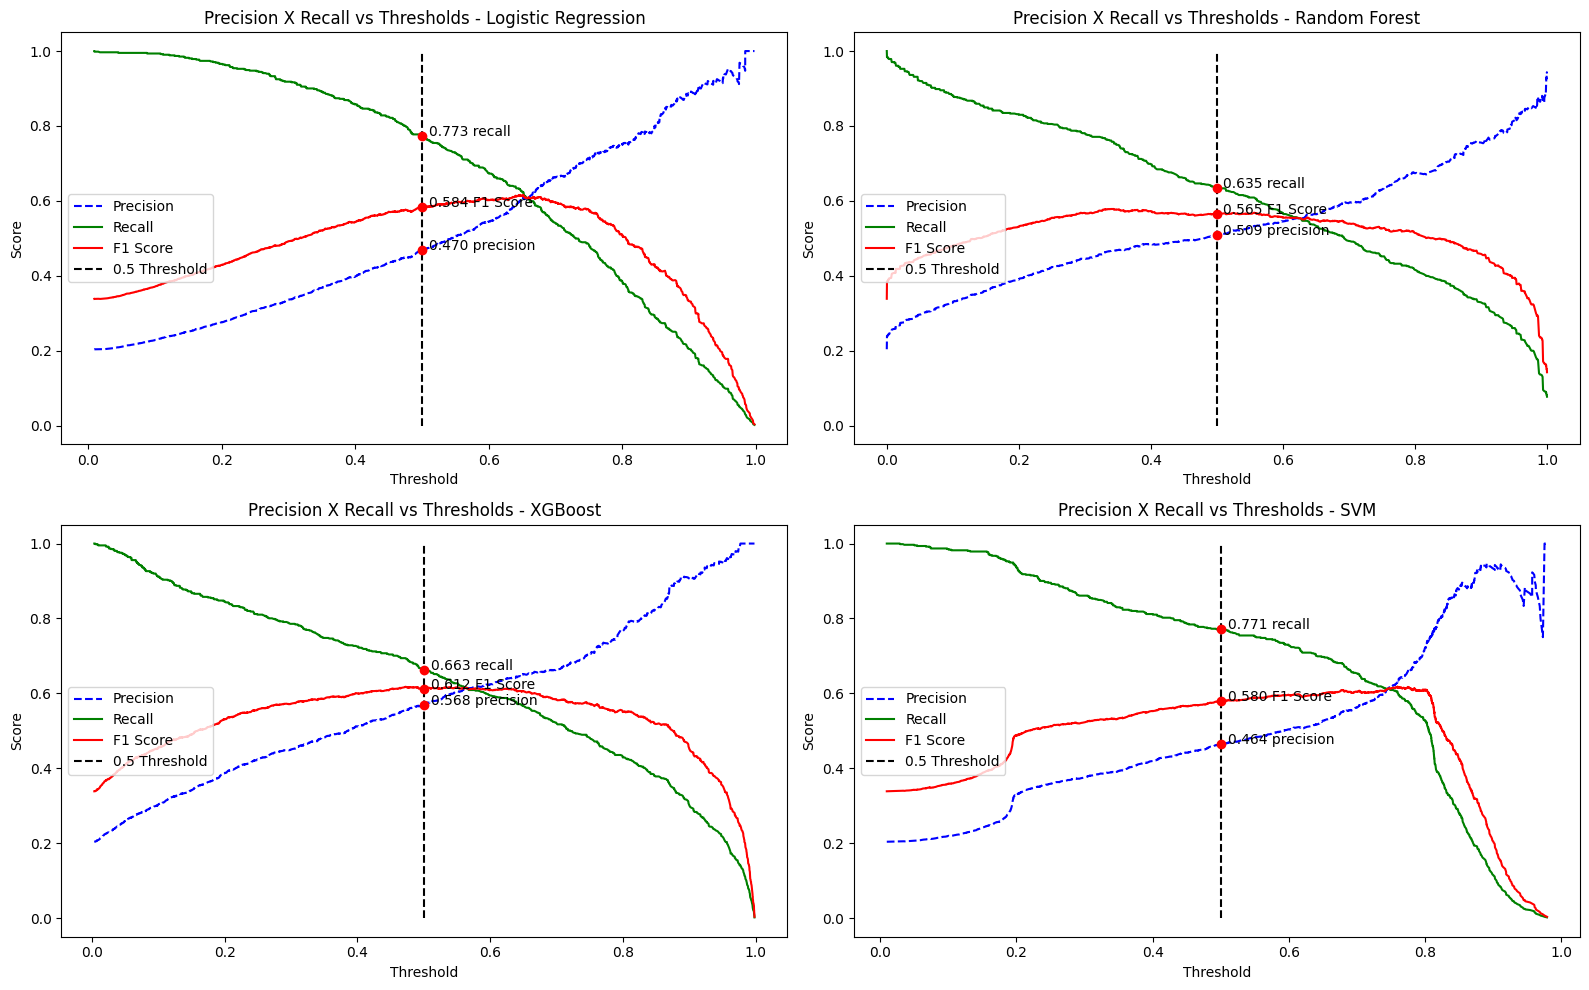

In [28]:
metrics_reduced_features_smote.plot_precision_recall_threshold(y_test_reduced, X_test_reduced, 2, 2)

### Observations:
- The same behavior regarding `f1` is shown when using SMOTE for all models when compared to the all features data

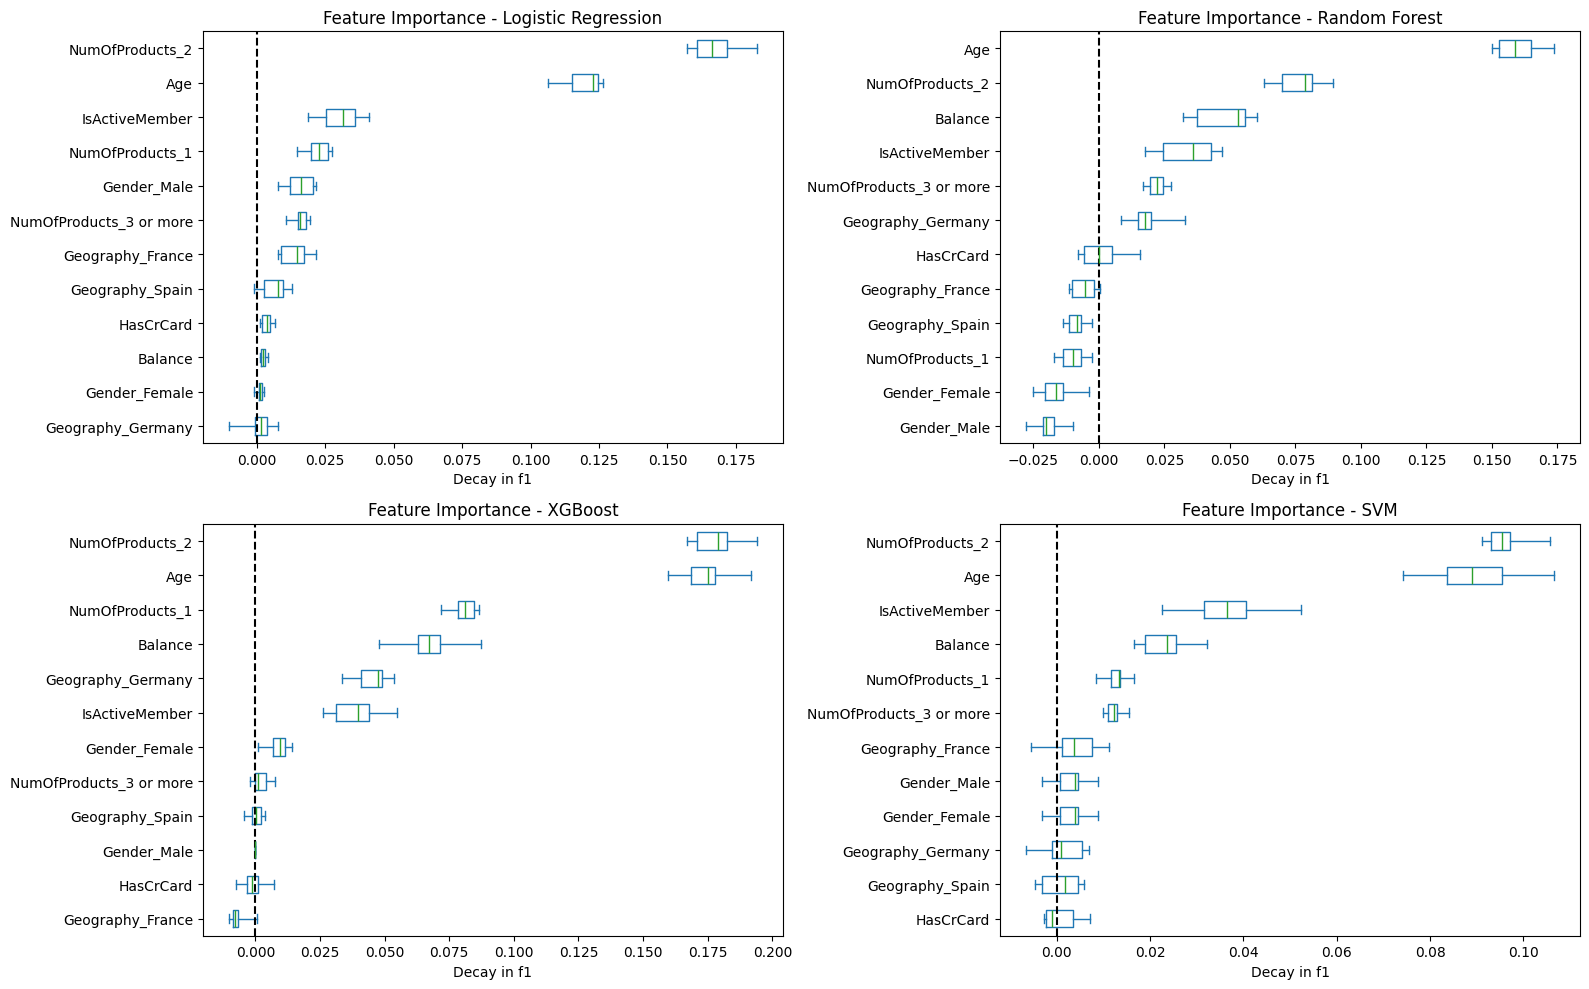

In [29]:
metrics_reduced_features_smote.plot_feature_importance(y_test_reduced, X_test_reduced, "f1", 2, 2)

### Observations:
- The same columns are at the top of most important features for all models like `Age`, `NumOfProducts2`, `IsActiveMember`
- The Random Forest model now has a clear line between contributing features and hurtful features. Only the top 6 helps the model, with all others causing harm. This can explain why this iteration of the model was by far the worse one

# Best models

### From these results, it's clear that the Logistic Regression and SVM models are not the best choices. They performed very badly in all trainings
### Between the Random Forest and the XGBoost, it's possible to select one version of each and draw some comparisons. The XGBoost using the parameter `class_weight` and trained with the reduced features dataset, shows that by altering its threshold (to about 0.3), it can have a very good improvement. The Random Forest, also using `class_weight`, but trained with the all features dataset, had the lowest amount of errors (when combining false negatives and false positives), with the lowest amount of false negatives and an acceptable number of false positives
### With this, it's possible to draw the confusion matrices and clasification reports of these two models, while changing the threshold of the XGBoost, to see what the results are

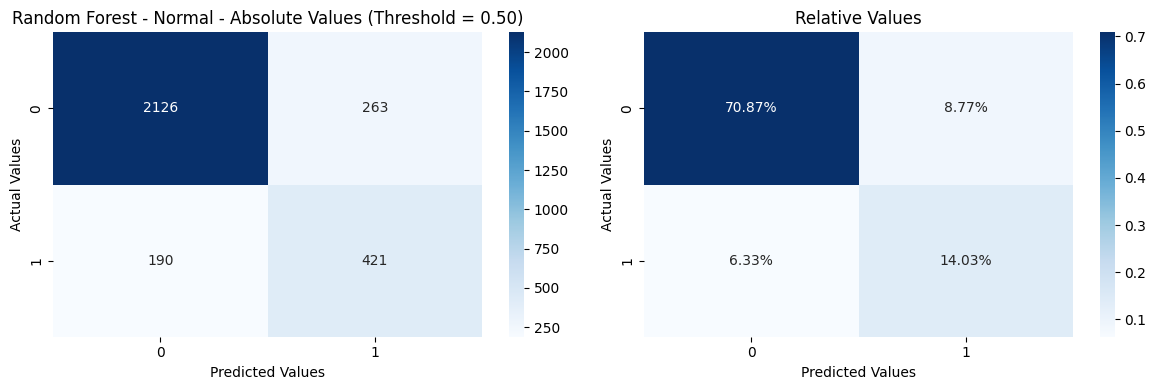

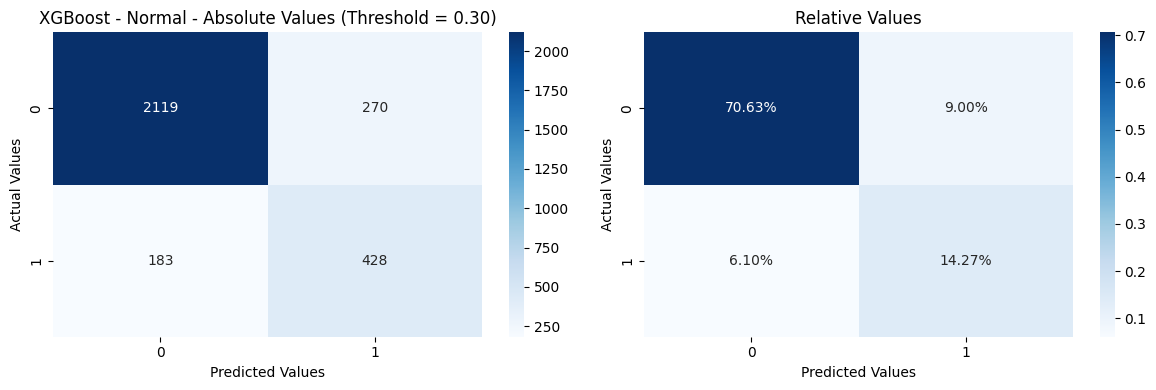

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      2389
           1       0.62      0.69      0.65       611

    accuracy                           0.85      3000
   macro avg       0.77      0.79      0.78      3000
weighted avg       0.86      0.85      0.85      3000
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      2389
           1       0.61      0.70      0.65       611

    accuracy                           0.85      3000
   macro avg       0.77      0.79      0.78      3000
weighted avg       0.86      0.85      0.85      3000



In [92]:
# Since the models were trained using two different datasets, the function needs to be called twice
compare_confusion_matrices(y_test_all, X_test_all, [(model_report_all_features, "Normal")], {"Random Forest - Normal": 0.5}, rows=1, columns=2)
compare_confusion_matrices(y_test_reduced, X_test_reduced, [(model_report_reduced_features, "Normal")], {"XGBoost - Normal": 0.3}, rows=1, columns=2)

from sklearn.metrics import classification_report
rf_model = model_report_all_features["Random Forest"]["model"]
y_pred_prob_rf = rf_model.predict(X_test_all)
xgboost_model = model_report_reduced_features["XGBoost"]["model"]
y_pred_prob_xgb = xgboost_model.predict_proba(X_test_reduced)[:, 1]
y_pred_thresholded = (y_pred_prob_xgb >= 0.3).astype(int)
print(classification_report(y_test_all, y_pred_prob_rf), classification_report(y_test_reduced, y_pred_thresholded))

# Conclusion
### As the analysis and reports demonstrate, the XGBoost model with a threshold of 0.3 is the best choice for this project, even though its performance is only slightly better than the Random Forest model. While both models achieved the same `f1-score`, some factors make XGBoost the preferred option:
- Minimizing False Negatives: It’s more expensive for the institution to attract and maintain new clients than to keep existing ones. Since XGBoost results in fewer false negatives, it’s better aligned with the goal of retaining clients
- Simpler Model with Fewer Features: The XGBoost model, trained on a reduced set of features, delivers strong results while requiring less data. This not only makes the model easier to interpret and faster to run
- Better Alignment with Business Priorities: By adjusting the threshold to 0.3, the model is tuned to the institution’s focus on balancing precision and recall, ensuring predictions are more useful for decision-making

# Saving, loading and using the best model

In [93]:
trainer.save_model("XGBoost - Reduced Features", 1, "../artifacts", "model")

In [8]:
import pickle
model_path = "../artifacts/model.pkl"
with open(model_path, "rb") as f:
    model = pickle.load(f)

In [10]:
test_data = pd.read_csv("./Data/Abandono_teste.csv", sep=";")
test_data_preprocessed = preprocess.preprocess_data(test_data, reduced_columns=True, test_data=True, preprocessor="preprocessor_reduced")

In [13]:
test_data_probabilities = model.predict_proba(test_data_preprocessed)[:, 1]
test_data_predictions = (test_data_probabilities >= 0.3).astype(int)
results = pd.DataFrame({
    "rowNumber": test_data["RowNumber"],
    "predictedValues": test_data_predictions
})
print(f"Shape: {results.shape}")
results.head()

Shape: (1000, 2)


,rowNumber,predictedValues
0,10001,0
1,10002,0
2,10003,0
3,10004,0
4,10005,0


In [15]:
results[results["predictedValues"] > 0].shape

(241, 2)

# Saving the new dataset with `rowNumber` and `predictedValues`

In [17]:
results.to_csv("../results.csv", index=False)